In [2]:
%config Completer.use_jedi=False
import folium
import pandas as pd
import numpy as np
import requests,json
import time

In [8]:
df=pd.read_csv("reg_df.csv")

In [37]:
df.columns

Index(['reg', 'lat', 'long', 'prov'], dtype='object')

In [43]:
#Egypt coordiante 26.8206° N, 30.8025° E
loc_egy=[26.8206,30.025]
egy_map=folium.Map(loc_egy,zoom_start=6)
for cell in df.itertuples():
    folium.CircleMarker(location=[cell.lat,cell.long],radius=7,popup=cell.reg,color='blue',
                       fill=True,fill_color='red',fill_opacity=.7).add_to(egy_map)

In [44]:
egy_map

In [11]:
with open("auth_foursquar.json",'r') as f:
    auth=json.loads(f.read())

In [23]:
client_id=auth["client_id"]
client_secret=auth["client_secret"]
version="20210816"
limit=100
radius=1000
lat,long=30.034722,31.231188#Garden City, Cairo ,egypt

In [29]:
foursquar_url="https://api.foursquare.com/v2/venues/explore/"

In [30]:
url_parm={
    "client_id":client_id,
    "client_secret":client_secret,
    'v':version,
    'll':f"{lat},{long}",
    "radius":radius,
    'limit':limit
}

In [31]:
test=requests.get(foursquar_url,params=url_parm)

In [61]:
test.json()['response']['groups'][0]['items']

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4ba24619f964a520dae837e3',
   'name': 'Four Seasons Hotel Cairo at Nile Plaza',
   'location': {'address': '1089 Corniche El Nile',
    'lat': 30.036237,
    'lng': 31.229551,
    'labeledLatLngs': [{'label': 'display',
      'lat': 30.036237,
      'lng': 31.229551}],
    'distance': 230,
    'postalCode': '11519',
    'cc': 'EG',
    'city': 'قصر الدبر',
    'state': 'القاهرة',
    'country': 'مصر',
    'formattedAddress': ['1089 Corniche El Nile',
     'قصر الدبر',
     'القاهرة',
     '11519',
     'مصر']},
   'categories': [{'id': '4bf58dd8d48988d1fa931735',
     'name': 'Hotel',
     'pluralName': 'Hotels',
     'shortName': 'Hotel',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'referralId'

In [120]:
print(test.json()['response']['groups'][0]['items'][0]['venue']['name'])

print(test.json()['response']['groups'][0]['items'][0]['venue']['location']['lat'])
print(test.json()['response']['groups'][0]['items'][0]['venue']['location']['lng'])

test.json()['response']['groups'][0]['items'][0]['venue']['categories'][0]['name']

Four Seasons Hotel Cairo at Nile Plaza
30.036237
31.229551


'Hotel'

In [144]:
# del lat,long
def get_data_four_square(limit=100,radius=1000):
    data=[]
    none_data=0
    foursquar_url="https://api.foursquare.com/v2/venues/explore/"
    url_parm={
    "client_id":client_id,
    "client_secret":client_secret,
    'v':version,
    "radius":radius,
    'limit':limit}
    for cell in df.itertuples():
        lat=cell.lat
        long=cell.long
        reg=cell.reg
        prov=cell.prov
        url_parm['ll']=f"{lat},{long}"
        result=requests.get(foursquar_url,params=url_parm).json()['response']['groups'][0]['items']
        if len(result)==0:
            none_data+=1
            print("no data found")
        data+=[{'reg':reg,'prov':prov,'reg_lat':lat,
                    'reg_lng':long,"venue":v['venue']['name'], 
                    'venue_lat':v['venue']['location']['lat'],
                    'venue_lng':v['venue']['location']['lng'],
                     'cat':v['venue']['categories'][0]['name'],
                    }for v in result]
        print(f'doen {cell.reg}')
    print(f"size of data {len(data)}")
    print(f"an error found : {none_data}")
    return data        

In [145]:
data=get_data_four_square()

doen Ain Shams ,egypt
doen Azbakeya ,egypt
doen Bab al-Louq ,egypt
doen Boulaq ,egypt
doen Coptic Cairo ,egypt
doen Downtown Cairo ,egypt
doen El Manial ,egypt
doen El Marg ,egypt
doen El Matareya, Cairo ,egypt
doen El Rehab ,egypt
doen El Sahel ,egypt
doen Ezbet El Nakhl ,egypt
doen Faggala ,egypt
doen Fifth Settlement ,egypt
doen Fustat ,egypt
doen Garden City, Cairo ,egypt
doen Gezira  ,egypt
doen Heliopolis, Cairo ,egypt
doen Islamic Cairo ,egypt
doen Maadi ,egypt
doen Old Cairo ,egypt
doen Roda Island ,egypt
doen Shubra  ,egypt
doen Zamalek ,egypt
doen Zeitoun, Cairo ,egypt
doen Abu Radis  ,egypt
doen El Tor ,egypt
doen Dahab ,egypt
doen Nuweiba ,egypt
doen Ras Sidr ,egypt
doen Saint Catherine ,egypt
doen Sharm El Sheikh 1 ,egypt
doen Taba ,egypt
size of data 1180
an error found : 0


In [147]:
df_new=pd.DataFrame(data)

In [148]:
df_new.head()

,reg,prov,reg_lat,reg_lng,venue,venue_lat,venue_lng,cat
0,"Ain Shams ,egypt",cairo,30.130476,31.316749,Farghaly (فرغلي),30.123217,31.317824,Café
1,"Ain Shams ,egypt",cairo,30.130476,31.316749,Ain Shams Metro Station (محطة مترو عين شمس),30.131056,31.319025,Metro Station
2,"Ain Shams ,egypt",cairo,30.130476,31.316749,43's Bus Station,30.126521,31.316418,Bus Station
3,"Ain Shams ,egypt",cairo,30.130476,31.316749,El Omda Café,30.125736,31.315975,Café
4,"Ain Shams ,egypt",cairo,30.130476,31.316749,Argela,30.124741,31.313562,Café


In [149]:
df_new.cat.value_counts()

Café                        150
Hotel                        54
Coffee Shop                  40
Restaurant                   39
Egyptian Restaurant          37
                           ... 
Gift Shop                     1
Used Bookstore                1
Mediterranean Restaurant      1
Moving Target                 1
Music School                  1
Name: cat, Length: 181, dtype: int64

In [151]:
df_new.to_csv("df_new.csv",index=False)

In [3]:
#reopen df #checkpoint
df=pd.read_csv("df_new.csv")

In [4]:
def one_hot():
    temp_df=pd.get_dummies(df.cat)
    temp_df.insert(0,'reg',df.reg)
    return temp_df

In [5]:
one_hot_df=one_hot()

In [6]:
blr_grouped=one_hot_df.groupby(by='reg').sum().reset_index().copy()

In [7]:
def most_commen(limit=2,rank=10):
    blr_grouped=one_hot_df.groupby(by='reg').sum().reset_index().copy()
    output=[]
    for i in range(len(blr_grouped)):
        temp=[]
        data=blr_grouped.iloc[i,1:].sort_values(ascending=False)[:rank]
        for i in data.keys():
            val=data[i]
            if float(val)>=limit:
                temp.append(i)
            else:
                temp.append(None)
            output.append(temp)
    new_df=pd.DataFrame(output,columns=["mostCommon"+str(i+1) for i in range(10)])
    new_df.insert(0,'reg',df.reg)
    new_df.insert(1,'venue',df.venue)
    return new_df

In [8]:
most_common_df=most_commen(limit=1)

In [9]:
most_common_df.head()

,reg,venue,mostCommon1,mostCommon2,mostCommon3,mostCommon4,mostCommon5,mostCommon6,mostCommon7,mostCommon8,mostCommon9,mostCommon10
0,"Ain Shams ,egypt",Farghaly (فرغلي),Airport,None,None,None,None,None,None,None,None,None
1,"Ain Shams ,egypt",Ain Shams Metro Station (محطة مترو عين شمس),Airport,None,None,None,None,None,None,None,None,None
2,"Ain Shams ,egypt",43's Bus Station,Airport,None,None,None,None,None,None,None,None,None
3,"Ain Shams ,egypt",El Omda Café,Airport,None,None,None,None,None,None,None,None,None
4,"Ain Shams ,egypt",Argela,Airport,None,None,None,None,None,None,None,None,None


In [10]:
most_common_df[-100:]

,reg,venue,mostCommon1,mostCommon2,mostCommon3,mostCommon4,mostCommon5,mostCommon6,mostCommon7,mostCommon8,mostCommon9,mostCommon10
230,"Boulaq ,egypt",Azza Fahmy,Motel,Hotel,Café,Campground,Boat or Ferry,Korean Restaurant,Fish & Chips Shop,Beach,Rock Climbing Spot,Coffee Shop
231,"Boulaq ,egypt",Starbucks,Motel,Hotel,Café,Campground,Boat or Ferry,Korean Restaurant,Fish & Chips Shop,Beach,Rock Climbing Spot,Coffee Shop
232,"Boulaq ,egypt",Holm,Motel,Hotel,Café,Campground,Boat or Ferry,Korean Restaurant,Fish & Chips Shop,Beach,Rock Climbing Spot,Coffee Shop
233,"Boulaq ,egypt",Fairmont Nile City Sky Pool,Motel,Hotel,Café,Campground,Boat or Ferry,Korean Restaurant,Fish & Chips Shop,Beach,Rock Climbing Spot,Coffee Shop
234,"Boulaq ,egypt",Mandarine Koueider,Motel,Hotel,Café,Campground,Boat or Ferry,Korean Restaurant,Fish & Chips Shop,Beach,Rock Climbing Spot,Coffee Shop
...,...,...,...,...,...,...,...,...,...,...,...,...
325,"El Marg ,egypt",Popeye Pastries,Café,Plaza,Metro Station,Pharmacy,Fried Chicken Joint,Sports Club,Supermarket,Athletics & Sports,Gym / Fitness Center,Falafel Restaurant
326,"El Marg ,egypt",New El Marg Metro Station (محطة مترو المرج الج...,Café,Plaza,Metro Station,Pharmacy,Fried Chicken Joint,Sports Club,Supermarket,Athletics & Sports,Gym / Fitness Center,Falafel Restaurant
327,"El Marg ,egypt",El Prince Cafe,Café,Plaza,Metro Station,Pharmacy,Fried Chicken Joint,Sports Club,Supermarket,Athletics & Sports,Gym / Fitness Center,Falafel Restaurant
328,"El Matareya, Cairo ,egypt",El Gomhuria Restaurant (مطعم الجمهوريه),Café,Plaza,Metro Station,Pharmacy,Fried Chicken Joint,Sports Club,Supermarket,Athletics & Sports,Gym / Fitness Center,Falafel Restaurant


In [11]:
from sklearn.cluster import KMeans

In [12]:
#becouse the data could be not enough to make cluster on each region so we will cluster to 
# all region at once to get good result as we hope ^_^

In [13]:
#prepare oure data frame for kmeans
vnc_grouped=one_hot_df.groupby('reg').sum().reset_index(drop=False)

In [14]:
from matplotlib import pyplot as plt

In [15]:
def show_elbo_curve(k=(2,7)):
    des=[]
    for k in range(k[0],k[1]):
        temp_kmeans=KMeans(n_clusters=k).fit(vnc_grouped.drop(columns=['reg']))
        des.append(temp_kmeans.inertia_)
    fig=plt.Figure(figsize=(10,10))
    print(des)
    plt.plot(range(2,7),des)
    plt.title("elbo_curve")
    plt.show()

[1837.3521739130435, 1476.7632850241546, 1217.366459627329, 998.8188405797101, 880.1521739130435]


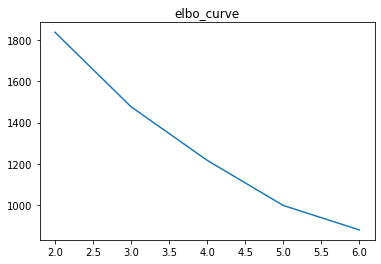

In [16]:
show_elbo_curve()

In [17]:
#becouse of low data the elbwo curve look like more liner than curve 
#but we have get that k=5 is the best choice that will give us lower cost or error
#so better result
#note with premium foursquare api more data will we get good result and more accurate will we got

In [18]:
k=5
kmeans_vnc=KMeans(n_clusters=k).fit(vnc_grouped.drop(columns=['reg']))

In [19]:
len(kmeans_vnc.labels_)

33

In [20]:
df.loc[df.reg.str.contains('Ain Shams ,egy'),'reg_lng'].values[0]

31.316749100000006

In [21]:
def get_lat_long_reg():
    temp=vnc_grouped.copy()
    for i in temp.reg:
        lat=df.loc[df.reg.str.contains(i),'reg_lat'].values[0]
        lng=df.loc[df.reg.str.contains(i),'reg_lng'].values[0]
        temp.loc[temp.reg==i,'lat']=lat
        temp.loc[temp.reg==i,'lng']=lng
    return temp

In [22]:
output=get_lat_long_reg()

In [23]:
output.head()

,reg,Accessories Store,African Restaurant,Airport,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,...,Train Station,Tunnel,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Waterfront,Yemeni Restaurant,Yoga Studio,lat,lng
0,"Abu Radis ,egypt",0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28.900596,33.200534
1,"Ain Shams ,egypt",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,30.130476,31.316749
2,"Azbakeya ,egypt",1,0,0,0,0,0,2,0,0,...,0,1,0,1,0,0,0,0,30.053889,31.245473
3,"Bab al-Louq ,egypt",0,0,0,0,0,0,3,0,1,...,0,0,0,0,0,0,0,0,30.044271,31.239829
4,"Boulaq ,egypt",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,30.063093,31.228926


In [24]:
#adding cluster
output.loc[:,'cluster']=kmeans_vnc.labels_

In [25]:
output[['reg','lat','lng','cluster']]

,reg,lat,lng,cluster
0,"Abu Radis ,egypt",28.900596,33.200534,0
1,"Ain Shams ,egypt",30.130476,31.316749,0
2,"Azbakeya ,egypt",30.053889,31.245473,2
3,"Bab al-Louq ,egypt",30.044271,31.239829,2
4,"Boulaq ,egypt",30.063093,31.228926,1
5,"Coptic Cairo ,egypt",30.006478,31.231841,0
6,"Dahab ,egypt",28.496363,34.514565,4
7,"Downtown Cairo ,egypt",30.088761,31.289820,0
8,"El Manial ,egypt",29.952956,31.239584,0
9,"El Marg ,egypt",30.152778,31.338333,0


In [164]:
loc_egy=[26.8206,30.025]
new_map=folium.Map(location=loc_egy,zoom_start=6)
def show_cluster_in_map():
    color=['green','blue','orange','black','red']
    for i in output.itertuples():
        folium.CircleMarker(location=[i.lat,i.lng],popup="cluster : "+str(i.cluster+1),color=color[i.cluster],
                           fill=True,fill_color=color[i.cluster],fill_opacity=.7).add_to(new_map)
show_cluster_in_map()

In [165]:
new_map

In [33]:
vnc_grouped.loc[:,'cluster']=kmeans_vnc.labels_

In [158]:
def report(cluster,limit=10):
    temp_df=vnc_grouped.loc[vnc_grouped.cluster==cluster-1,vnc_grouped.columns.drop(['reg'])].groupby('cluster').sum()
    temp_df.reset_index(inplace=True)
    col=temp_df.columns.values.reshape(-1,1)
    values=temp_df.values.reshape(-1,1)
    output=pd.DataFrame(data=col,columns=['target'])
    output['val']=values
    output.sort_values(by='val',ascending=False,inplace=True)
    output.iloc[:limit].plot(kind='bar',x='target',y='val');

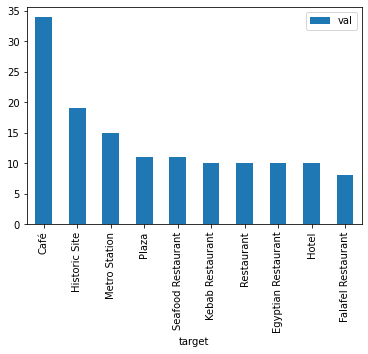

In [159]:
#report the properties of cluster 1
#this important to study cluster for identifning meaning in investment way 
report(1)

In [ ]:
#cluster 1 with green circle in map this cluster take place in cairo and south sinia specially in  historic site
#as  u see historic site got rank two in figure above
# and cafe shop get first ranke which is make sence

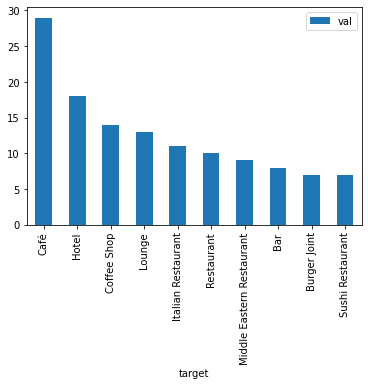

In [160]:
#report the properties of cluster 2
#this important to study cluster for identifning meaning in investment way 
report(2)

In [167]:
#cluster 2 with blue circle in map this cluster take place in cairo only in special view 
#all blue circle overlooking to nile revier so u can see hotel got second in rank
#also see the rest of 10 rank almost are restruants 


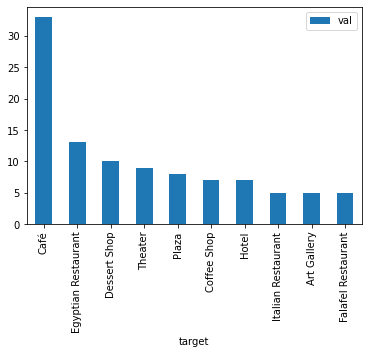

In [161]:
#report the properties of cluster 3
#this important to study cluster for identifning meaning in investment way 
report(3)

In [ ]:
#cluster 3 with yellow circle in map this cluster take place in cairo only
#it beside cluster 2 but not looking over in nile revier and it's indide cairo
#soo cafe got first rank and restruant but hotel got senvth rank look like cheaper than hotels in  cluster 2
#in this cluster there is a new makrt art gallery got ninth 
#u can see theater which new also but higher rank got fourth
#also see the rest of 10 rank almost are restruants 


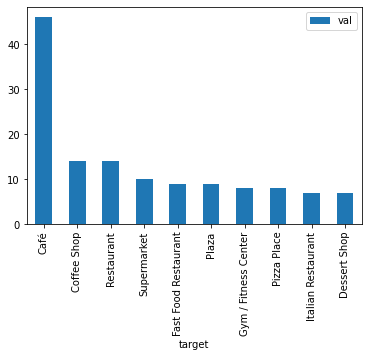

In [162]:
#report the properties of cluster 4
#this important to study cluster for identifning meaning in investment way 
report(4)

In [ ]:
#cluster 4 with black circle in map this cluster take place in cairo only

# cafe got first rank and restruant 
#cafe in this cluster is got highest among other clusters
#in this cluster there is a new market GYM got seventh 
#u can see plaza which new also but higher rank got sixth
#supermarket got third 
#this cluster almost inside cities 


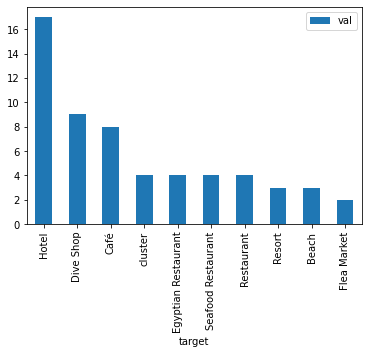

In [163]:
#report the properties of cluster 5
#this important to study cluster for identifning meaning in investment way 
report(5)

In [168]:
#cluster 5 with red circle in map this cluster take place in south sinia only
#it is overlooking red sea so hotels got highest rank also dive shop
#there is a new type of restaurant which seafood restrunat becouse of red sea
#hotels in this cluster is got highest among other clusters
 #this cluster is unique


In [166]:
new_map